# <u> NACEP </u>
## 2015-16 CRDC
## AP v. DE Flag Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected = True)

%matplotlib inline
sns.set_style('whitegrid')
plt.rc('axes', titlesize = 14, titleweight = 'bold', labelweight = 'bold')

In [2]:
hs = pd.read_csv('../filtered_data/04_filter_final.csv', dtype = {'LEAID':np.object})

In [3]:
hs.columns.values

array(['COMBOKEY', 'SCH_NAME', 'GSHI', 'GSLO', 'High_Grade_12', 'JJ',
       'LAT1516', 'LEAID', 'LEA_NAME', 'LEA_STATE', 'LEA_STATE_NAME',
       'LEVEL', 'LOCALE15', 'LON1516', 'Low_Grade_Above9', 'NMCNTY15',
       'SCHID', 'SCH_APENR_AM_F', 'SCH_APENR_AM_M', 'SCH_APENR_AS_F',
       'SCH_APENR_AS_M', 'SCH_APENR_BL_F', 'SCH_APENR_BL_M',
       'SCH_APENR_HI_F', 'SCH_APENR_HI_M', 'SCH_APENR_HP_F',
       'SCH_APENR_HP_M', 'SCH_APENR_IDEA_F', 'SCH_APENR_IDEA_M',
       'SCH_APENR_IND', 'SCH_APENR_LEP_F', 'SCH_APENR_LEP_M',
       'SCH_APENR_TR_F', 'SCH_APENR_TR_M', 'SCH_APENR_WH_F',
       'SCH_APENR_WH_M', 'SCH_DUALENR_AM_F', 'SCH_DUALENR_AM_M',
       'SCH_DUALENR_AS_F', 'SCH_DUALENR_AS_M', 'SCH_DUALENR_BL_F',
       'SCH_DUALENR_BL_M', 'SCH_DUALENR_HI_F', 'SCH_DUALENR_HI_M',
       'SCH_DUALENR_HP_F', 'SCH_DUALENR_HP_M', 'SCH_DUALENR_IDEA_F',
       'SCH_DUALENR_IDEA_M', 'SCH_DUALENR_LEP_F', 'SCH_DUALENR_LEP_M',
       'SCH_DUALENR_TR_F', 'SCH_DUALENR_TR_M', 'SCH_DUALENR_WH_F',
   

# I. Overall Breakdowns

<div class = 'alert alert-cell alert-info'>**All DE**</div>

In [4]:
de_breakdown = hs.groupby(['SCH_DUAL_IND'])['LEAID'].count()
print(de_breakdown)
print("")
de_pct = round(de_breakdown.iloc[1] / (de_breakdown.iloc[0] + de_breakdown.iloc[1]), 3)
print(str(de_pct) + " percent of schools in this dataset reported that they offered dual enrollment in 2013-2014.")

SCH_DUAL_IND
No      4162
Yes    11563
Name: LEAID, dtype: int64

0.735 percent of schools in this dataset reported that they offered dual enrollment in 2013-2014.


<div class = 'alert alert-cell alert-info'>**All AP**</div>

In [5]:
ap_breakdown = hs.groupby(['SCH_APENR_IND'])['LEAID'].count()
print(ap_breakdown)
print("")
ap_pct = round(ap_breakdown.iloc[1] / (ap_breakdown.iloc[0] + ap_breakdown.iloc[1]), 3)
print(str(ap_pct) + " percent of schools in this dataset reported that they offered AP in 2013-2014.")

SCH_APENR_IND
No      4195
Yes    11530
Name: LEAID, dtype: int64

0.733 percent of schools in this dataset reported that they offered AP in 2013-2014.


<div class = 'alert alert-cell alert-info'>**Number of DE-Only**</div>

In [6]:
de_only = len(hs[(hs['SCH_DUAL_IND'] == 'Yes') & (hs['SCH_APENR_IND'] == 'No')].index)
de_only

2879

<div class = 'alert alert-cell alert-info'>**Number of AP-Only**</div>

In [7]:
ap_only = len(hs[(hs['SCH_DUAL_IND'] == 'No') & (hs['SCH_APENR_IND'] == 'Yes')].index)
ap_only

2846

<div class = 'alert alert-cell alert-info'>** Number offering both **</div>

In [8]:
de_and_ap = len(hs[((hs['SCH_DUAL_IND'] == 'Yes') & (hs['SCH_APENR_IND'] == 'Yes'))].index)
de_and_ap

8684

<div class = 'alert alert-cell alert-info'>**Number offering Neither**</div>

In [9]:
neither = len(hs[(hs['SCH_DUAL_IND'] == 'No') & (hs['SCH_APENR_IND'] == 'No')].index)
neither

1316

# II. By State

<div class = 'alert alert-cell alert-info'>**DE**</div>

In [10]:
de_by_state = hs.groupby(['LEA_STATE', 'SCH_DUAL_IND'])['LEAID'].count().unstack().reset_index()
de_by_state['Total Schools'] = (de_by_state['Yes'] + de_by_state['No'])
de_by_state['pct'] = round(de_by_state['Yes'] / (de_by_state['Yes'] + de_by_state['No']), 2)

In [11]:
display(de_by_state.drop(['No'], axis = 1).sort_values('pct', ascending=False))

SCH_DUAL_IND,LEA_STATE,Yes,Total Schools,pct
12,IA,289,295,0.98
11,HI,38,39,0.97
40,SC,195,203,0.96
46,VT,42,44,0.95
13,ID,97,106,0.92
10,GA,355,387,0.92
24,MO,437,473,0.92
9,FL,425,467,0.91
45,VA,275,307,0.90
32,NM,130,146,0.89


In [12]:
de_data = dict(type = 'choropleth',
            locations = de_by_state['LEA_STATE'],
            locationmode = 'USA-states',
            colorscale = [[0.0, 'rgb(255,255,255)'], [.2, 'rgb(255,221,221)'], [.4, 'rgb(255, 200, 200)'], [0.8, 'rgb(255, 50, 50)'], [1.0, 'rgb(180,0,0)']],
            reversescale = False,
            z = de_by_state['pct'])

In [13]:
de_layout = dict(title = '2015-2016 DE-Offered Percentages',
              geo = {'scope':'usa'})

In [14]:
de_choromap = go.Figure(data = [de_data], layout = de_layout)

In [15]:
iplot(de_choromap)
# iplot(de_choromap, image = 'png', filename='./Visualizations/by_state_de_choropleth')

<div class = 'alert alert-cell alert-warning'>**AP**</div>

In [16]:
ap_by_state = hs.groupby(['LEA_STATE', 'SCH_APENR_IND'])['LEAID'].count().unstack().reset_index()
"""Fill in Missing Values with 0"""
ap_by_state = ap_by_state.fillna(0)
ap_by_state[['Yes', 'No']] = ap_by_state[['Yes', 'No']].astype(int)
ap_by_state['Total Schools'] = (ap_by_state['Yes'] + ap_by_state['No'])
ap_by_state['pct'] = round(ap_by_state['Yes'] / (ap_by_state['Yes'] + ap_by_state['No']), 2)

In [17]:
display(ap_by_state.drop(['No'], axis = 1).sort_values('pct', ascending=False))

SCH_APENR_IND,LEA_STATE,Yes,Total Schools,pct
7,DC,24,24,1.00
49,WV,100,103,0.97
20,MD,176,185,0.95
31,NJ,334,350,0.95
11,HI,37,39,0.95
2,AR,249,265,0.94
9,FL,433,467,0.93
45,VA,285,307,0.93
46,VT,41,44,0.93
10,GA,359,387,0.93


In [18]:
ap_data = dict(type = 'choropleth',
            locations = ap_by_state['LEA_STATE'],
            locationmode = 'USA-states',
            colorscale = [[0.0, 'rgb(255,255,255)'], [.2, 'rgb(255,221,221)'], [.4, 'rgb(255, 200, 200)'], [0.8, 'rgb(255, 50, 50)'], [1.0, 'rgb(180,0,0)']],
            reversescale = False,
            z = ap_by_state['pct'])

In [19]:
ap_layout = dict(title = '2015-2016 AP-Offered Percentages',
              geo = {'scope':'usa'})

In [20]:
ap_choromap = go.Figure(data = [ap_data], layout = ap_layout)

In [21]:
iplot(ap_choromap)
# iplot(ap_choromap, image = 'png', filename='./Visualizations/by_state_ap_choropleth')

# III. By Size
(Based on Total Enrollment of School)

<div class = 'alert alert-cell alert-danger'>**Create a Size-of-School Classifier**</div>

In [22]:
hs['total_enrollment'] = hs['TOT_ENR_M'] + hs['TOT_ENR_F']

In [23]:
def school_sizer(enroll):
    if enroll < 100:
        return 1
    elif 100 <= enroll < 500:
        return 2
    elif 500 <= enroll < 1200:
        return 3
    return 4

In [24]:
hs['size_group'] = hs['total_enrollment'].apply(lambda x: school_sizer(x))

Text(0.5,0,'')

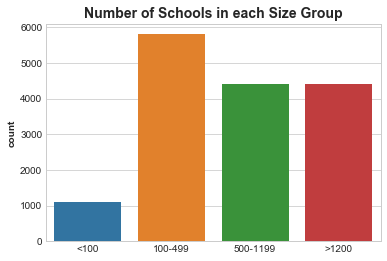

In [25]:
sns.countplot(x = 'size_group', data = hs)
plt.title('Number of Schools in each Size Group')
plt.xticks([0,1,2,3], ['<100', '100-499', '500-1199', '>1200'])
plt.xlabel('')

<div class = 'alert alert-cell alert-info'>**DE**</div>

In [26]:
hs_by_size = hs.groupby(['size_group', 'SCH_DUAL_IND'])['LEAID'].count().unstack().reset_index()
hs_by_size['Total Schools'] = (hs_by_size['Yes'] + hs_by_size['No'])
hs_by_size['pct_de'] = round(hs_by_size['Yes'] / (hs_by_size['Yes'] + hs_by_size['No']), 2)
hs_by_size.drop(['No'], axis = 1)

SCH_DUAL_IND,size_group,Yes,Total Schools,pct_de
0,1,607,1115,0.54
1,2,4237,5802,0.73
2,3,3347,4414,0.76
3,4,3372,4394,0.77


<div class = 'alert alert-cell alert-warning'>**AP**</div>

In [27]:
ap_by_size = hs.groupby(['size_group', 'SCH_APENR_IND'])['LEAID'].count().unstack().reset_index()
ap_by_size['Total Schools'] = (ap_by_size['Yes'] + ap_by_size['No'])
ap_by_size['pct_ap'] = round(ap_by_size['Yes'] / (ap_by_size['Yes'] + ap_by_size['No']), 2)
ap_by_size.drop(['No'], axis = 1)

SCH_APENR_IND,size_group,Yes,Total Schools,pct_ap
0,1,150,1115,0.13
1,2,3111,5802,0.54
2,3,3952,4414,0.90
3,4,4317,4394,0.98


<div class = 'alert alert-cell alert-danger'>**Visualizations**</div>

(0, 1)

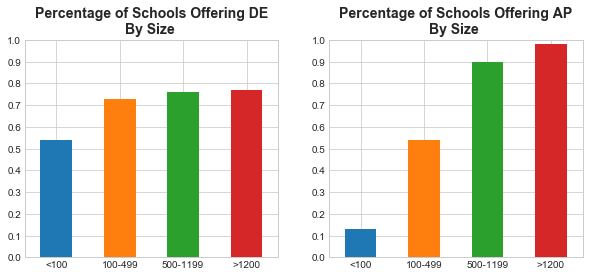

In [28]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,4))

plt.sca(ax1)
hs_by_size.plot.bar(x = 'size_group', y = 'pct_de', ax = ax1)
plt.xticks(rotation = 0)
plt.legend([])
plt.xlabel('')
plt.title('Percentage of Schools Offering DE\nBy Size ')
plt.yticks(np.arange(0,1.1,0.1))
plt.xticks([0,1,2,3], ['<100', '100-499', '500-1199', '>1200'])
plt.ylim([0,1])

plt.sca(ax2)
ap_by_size.plot.bar(x = 'size_group', y = 'pct_ap', ax=ax2)
plt.xticks(rotation = 0)
plt.legend([])
plt.xlabel('')
plt.title('Percentage of Schools Offering AP\nBy Size ')
plt.yticks(np.arange(0,1.1,0.1))
plt.xticks([0,1,2,3], ['<100', '100-499', '500-1199', '>1200'])
plt.ylim([0,1])

# IV. By Region

<div class = 'alert alert-cell alert-danger'>**Create a Region Classifer based on Region Accreditation**</div>

In [29]:
"""
1:  Middle States Commission on Higher Education - New York, New Jersey, Pennsylvania, Delaware, Maryland, the District of Columbia

2:  New England Association of Schools and Colleges - Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, and Vermont

3:  Higher Learning Commission - Arkansas, Arizona, Colorado, Iowa, Illinois, Indiana, Kansas, Michigan, Minnesota, Missouri, 
    North Dakota, Nebraska, New Mexico, Ohio, Oklahoma, South Dakota, Wisconsin, West Virginia, and Wyoming

4:  Northwest Commission on Colleges and Universities - Alaska, Idaho, Montana, Nevada, Oregon, Utah, and Washington

5:  Southern Association of Colleges and Schools - Alabama, Florida, Georgia, Kentucky, Louisiana, Mississippi, 
    North Carolina, South Carolina, Tennessee, Texas and Virginia

6:  Western Association of Schools and Colleges - California, Hawaii
"""

middle_states = "NY,NJ,PA,DE,MD,DC".split(',')
new_england = "CT,ME,MA,NH,RI,VT".split(',')
higher_learning_commission = "AR,AZ,CO,IA,IL,IN,KS,MI,MN,MO,ND,NE,NM,OH,OK,SD,WI,WV,WY".split(',')
northwest_commission = "AK,ID,MT,NV,OR,UT,WA".split(',')
southern_association = "AL,FL,GA,KY,LA,MS,NC,SC,TN,TX,VA".split(',')
western_association = "CA,HI".split(',')

In [30]:
def region_mapper(state):
    if state in middle_states:
        return "MSCHE"
    elif state in new_england:
        return "NEASC"
    elif state in higher_learning_commission:
        return "HLC"
    elif state in northwest_commission:
        return "NWCCU"
    elif state in southern_association:
        return "SACS"
    elif state in western_association:
        return "WASC"
    else:
        return "Messed Up"
    
hs['region_accred'] = hs['LEA_STATE'].apply(lambda x: region_mapper(x))

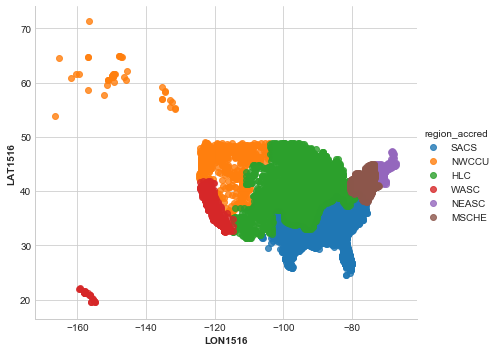

In [31]:
sns.lmplot(x = 'LON1516', y = 'LAT1516', data = hs, hue = 'region_accred', fit_reg = False, aspect = 1.2)
# plt.savefig(fname = './Visualizations/By_regionII_map_200.png', dpi = 200)

<div class = 'alert alert-cell alert-info'>**DE**</div>

In [32]:
de_by_region_accred = hs.groupby(['region_accred', 'SCH_DUAL_IND'])['LEA_STATE'].count().unstack('SCH_DUAL_IND').reset_index()
de_by_region_accred['Total Schools'] = (de_by_region_accred['Yes'] + de_by_region_accred['No'])
de_by_region_accred['pct_de'] = round(de_by_region_accred['Yes'] / (de_by_region_accred['Yes'] + de_by_region_accred['No']), 2)
de_by_region_accred.drop(['No'], axis = 1)

SCH_DUAL_IND,region_accred,Yes,Total Schools,pct_de
0,HLC,5044,6338,0.80
1,MSCHE,1240,2108,0.59
2,NEASC,423,726,0.58
3,NWCCU,756,1085,0.70
4,SACS,3640,4201,0.87
5,WASC,460,1267,0.36


<div class = 'alert alert-cell alert-warning'>**AP**</div>

In [33]:
ap_by_region_accred = hs.groupby(['region_accred', 'SCH_APENR_IND'])['LEA_STATE'].count().unstack().reset_index()
ap_by_region_accred['Total Schools'] = (ap_by_region_accred['Yes'] + ap_by_region_accred['No'])
ap_by_region_accred['pct_ap'] = round(ap_by_region_accred['Yes'] / (ap_by_region_accred['Yes'] + ap_by_region_accred['No']), 2)
ap_by_region_accred.drop(['No'], axis = 1)

SCH_APENR_IND,region_accred,Yes,Total Schools,pct_ap
0,HLC,3795,6338,0.60
1,MSCHE,1820,2108,0.86
2,NEASC,649,726,0.89
3,NWCCU,698,1085,0.64
4,SACS,3458,4201,0.82
5,WASC,1110,1267,0.88


<div class = 'alert alert-cell alert-danger'>**Visualizations**</div>


Text(0.5,0,'')

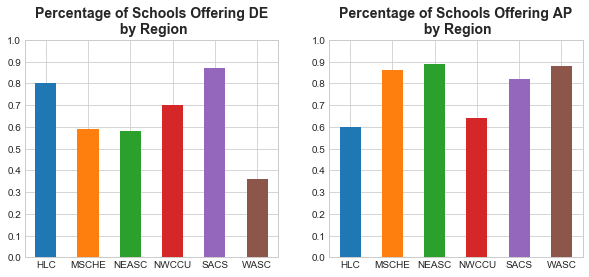

In [34]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,4))

plt.sca(ax1)
de_by_region_accred.plot.bar(x = 'region_accred', y = 'pct_de', ax=ax1)
plt.title('Percentage of Schools Offering DE\n by Region')
plt.xticks(rotation = 0)
plt.legend([])
plt.yticks(np.arange(0,1.1,0.1))
plt.ylim([0,1])
plt.xlabel('')

plt.sca(ax2)
ap_by_region_accred.plot.bar(x = 'region_accred', y = 'pct_ap', ax=ax2)
plt.title('Percentage of Schools Offering AP\n by Region')
plt.xticks(rotation = 0)
plt.legend([])
plt.yticks(np.arange(0,1.1,0.1))
plt.ylim([0,1])
plt.xlabel('')

# V. By Locale

<div class = 'alert alert-cell alert-danger'>**Creating a Locale Classifer**</div>

In [35]:
locale_map = {11: 'City', 12: 'City', 13: 'City', 14: 'City',
              21: 'Suburban', 22: 'Suburban', 23: 'Suburban', 24: 'Suburban',
              31: 'Town', 32: 'Town', 33: 'Town', 34: 'Town',
              41: 'Rural', 42: 'Rural', 43: 'Rural', 44: 'Rural'}

hs['locale_group'] = hs['LOCALE15'].map(locale_map)

<div class = 'alert alert-cell alert-info'>**DE**</div>

In [36]:
de_by_locale = hs.groupby(['locale_group', 'SCH_DUAL_IND'])['LEA_STATE'].count().unstack('SCH_DUAL_IND').reset_index()
de_by_locale['Total Schools'] = (de_by_locale['Yes'] + de_by_locale['No'])
de_by_locale['pct_de'] = round(de_by_locale['Yes'] / (de_by_locale['Yes'] + de_by_locale['No']), 2)
de_by_locale.drop(['No'], axis = 1)

SCH_DUAL_IND,locale_group,Yes,Total Schools,pct_de
0,City,1976,3347,0.59
1,Rural,4782,5935,0.81
2,Suburban,2888,4046,0.71
3,Town,1917,2397,0.80


<div class = 'alert alert-cell alert-warning'>**AP**</div>

In [37]:
ap_by_locale = hs.groupby(['locale_group', 'SCH_APENR_IND'])['LEA_STATE'].count().unstack().reset_index()
ap_by_locale['Total Schools'] = (ap_by_locale['Yes'] + ap_by_locale['No'])
ap_by_locale['pct_ap'] = round(ap_by_locale['Yes'] / (ap_by_locale['Yes'] + ap_by_locale['No']), 2)
ap_by_locale.drop(['No'], axis = 1)

SCH_APENR_IND,locale_group,Yes,Total Schools,pct_ap
0,City,2675,3347,0.80
1,Rural,3382,5935,0.57
2,Suburban,3700,4046,0.91
3,Town,1773,2397,0.74


<div class = 'alert alert-cell alert-danger'>**Visualizations**</div>

Text(0.5,0,'')

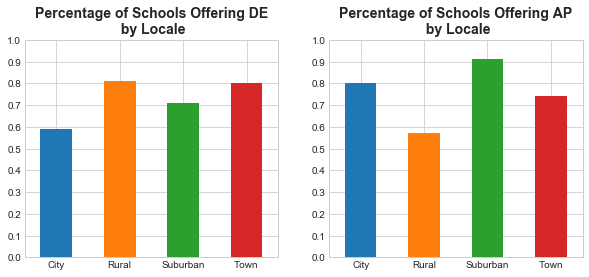

In [38]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,4))

plt.sca(ax1)
de_by_locale.plot.bar(x = 'locale_group', y = 'pct_de', ax=ax1)
plt.title('Percentage of Schools Offering DE\n by Locale')
plt.xticks(rotation = 0)
plt.legend([])
plt.yticks(np.arange(0,1.1,0.1))
plt.ylim([0,1])
plt.xlabel('')

plt.sca(ax2)
ap_by_locale.plot.bar(x = 'locale_group', y = 'pct_ap', ax=ax2)
plt.title('Percentage of Schools Offering AP\n by Locale')
plt.xticks(rotation = 0)
plt.legend([])
plt.yticks(np.arange(0,1.1,0.1))
plt.ylim([0,1])
plt.xlabel('')

# VI. By Charter Status

In [39]:
"""How many charter schools exist in the set?"""
hs.SCH_STATUS_CHARTER.value_counts()

No     14729
Yes      996
Name: SCH_STATUS_CHARTER, dtype: int64

<div class = 'alert alert-cell alert-info'>**DE**</div>

In [40]:
de_by_charter = hs.groupby(['SCH_STATUS_CHARTER', 'SCH_DUAL_IND'])['LEAID'].count().unstack().reset_index()
de_by_charter['SCH_STATUS_CHARTER'] = de_by_charter['SCH_STATUS_CHARTER'].map({'No':'Regular', 'Yes':'Charter'})
de_by_charter['Total Schools'] = (de_by_charter['No'] + de_by_charter['Yes'])
de_by_charter['pct_de'] = round(de_by_charter['Yes'] / (de_by_charter['No'] + de_by_charter['Yes']), 2)
de_by_charter.drop(['No'], axis = 1)

SCH_DUAL_IND,SCH_STATUS_CHARTER,Yes,Total Schools,pct_de
0,Regular,11143,14729,0.76
1,Charter,420,996,0.42


<div class = 'alert alert-cell alert-warning'>**AP**</div>

In [41]:
ap_by_charter = hs.groupby(['SCH_STATUS_CHARTER', 'SCH_APENR_IND'])['LEAID'].count().unstack().reset_index()
ap_by_charter['SCH_STATUS_CHARTER'] = ap_by_charter['SCH_STATUS_CHARTER'].map({'No':'Regular', 'Yes':'Charter'})
ap_by_charter['Total Schools'] = (ap_by_charter['No'] + ap_by_charter['Yes'])
ap_by_charter['pct_ap'] = round(ap_by_charter['Yes'] / (ap_by_charter['No'] + ap_by_charter['Yes']), 2)
ap_by_charter.drop(['No'], axis = 1)

SCH_APENR_IND,SCH_STATUS_CHARTER,Yes,Total Schools,pct_ap
0,Regular,11098,14729,0.75
1,Charter,432,996,0.43


<div class = 'alert alert-cell alert-danger'>**Visualizations**</div>

Text(0.5,0,'')

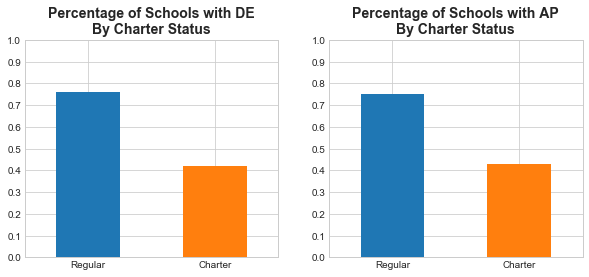

In [42]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,4))

plt.sca(ax1)
de_by_charter.plot.bar(x = 'SCH_STATUS_CHARTER', y = 'pct_de', ax=ax1)
plt.legend([])
plt.title('Percentage of Schools with DE\nBy Charter Status')
plt.xticks(rotation = 0)
plt.yticks(np.arange(0,1.1,0.1))
plt.ylim([0,1])
plt.xlabel('')

plt.sca(ax2)
ap_by_charter.plot.bar(x = 'SCH_STATUS_CHARTER', y = 'pct_ap', ax=ax2)
plt.legend([])
plt.title('Percentage of Schools with AP\nBy Charter Status')
plt.xticks(rotation = 0)
plt.yticks(np.arange(0,1.1,0.1))
plt.ylim([0,1])
plt.xlabel('')

# VII. By Title I Eligibility

<div class = 'alert alert-cell alert-danger'>**Filter out all schools with missing values**</div>

In [43]:
hs.TITLEI.value_counts()

Yes               9862
No                5524
-9                 260
Missing             73
Not Applicable       6
Name: TITLEI, dtype: int64

In [44]:
"""Remove the Misreported/Null Values"""
hs_by_titleI = hs.drop(hs[(hs.TITLEI == 'Missing') | (hs.TITLEI == 'Not Applicable') | (hs.TITLEI == '-9')].index, axis = 0)
hs_by_titleI.TITLEI.value_counts()

Yes    9862
No     5524
Name: TITLEI, dtype: int64

<div class = 'alert alert-cell alert-info'>**DE**</div>

In [45]:
de_by_titleI = hs_by_titleI.groupby(['TITLEI', 'SCH_DUAL_IND'])['LEAID'].count().unstack().reset_index()
de_by_titleI['TITLEI'] = de_by_titleI['TITLEI'].map({'Yes':'Eligible', 'No':'Not Eligible'})
de_by_titleI['Total Schools'] = (de_by_titleI['No'] + de_by_titleI['Yes'])
de_by_titleI['pct_de'] = round(de_by_titleI['Yes'] / (de_by_titleI['No'] + de_by_titleI['Yes']), 2)
de_by_titleI.drop(['No'], axis = 1)

SCH_DUAL_IND,TITLEI,Yes,Total Schools,pct_de
0,Not Eligible,4207,5524,0.76
1,Eligible,7113,9862,0.72


<div class = 'alert alert-cell alert-warning'>**AP**</div>

In [46]:
ap_by_titleI = hs_by_titleI.groupby(['TITLEI', 'SCH_APENR_IND'])['LEAID'].count().unstack().reset_index()
ap_by_titleI['TITLEI'] = ap_by_titleI['TITLEI'].map({'Yes':'Eligible', 'No':'Not Eligible'})
ap_by_titleI['Total Schools'] = (ap_by_titleI['No'] + ap_by_titleI['Yes'])
ap_by_titleI['pct_ap'] = round(ap_by_titleI['Yes'] / (ap_by_titleI['No'] + ap_by_titleI['Yes']), 2)
ap_by_titleI.drop(['No'], axis = 1)

SCH_APENR_IND,TITLEI,Yes,Total Schools,pct_ap
0,Not Eligible,4312,5524,0.78
1,Eligible,6978,9862,0.71


<div class = 'alert alert-cell alert-danger'>**Visualizations**</div>

Text(0.5,0,'')

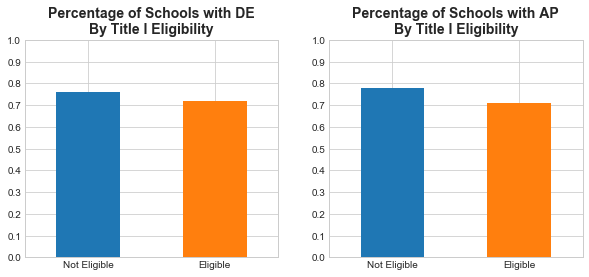

In [47]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,4))

plt.sca(ax1)
de_by_titleI.plot.bar(x = 'TITLEI', y = 'pct_de', ax=ax1)
plt.legend([])
plt.title('Percentage of Schools with DE\nBy Title I Eligibility')
plt.xticks(rotation = 0)
plt.yticks(np.arange(0,1.1,0.1))
plt.ylim([0,1])
plt.xlabel('')

plt.sca(ax2)
ap_by_titleI.plot.bar(x = 'TITLEI', y = 'pct_ap', ax=ax2)
plt.legend([])
plt.title('Percentage of Schools with AP\nBy Title I Eligibility')
plt.xticks(rotation = 0)
plt.yticks(np.arange(0,1.1,0.1))
plt.ylim([0,1])
plt.xlabel('')

# VIII. By Ethnicity Quintiles

<div class = 'alert alert-cell alert-danger'>**Calculate the percent ethnicity of all schools in the set and group schools into quintiles**</div>

In [48]:
hs['pct_eth'] = (hs['total_enrollment'] - hs['SCH_ENR_WH_F'] - hs['SCH_ENR_WH_M']) / hs['total_enrollment']

Text(0.5,0,'Ethnicity Percentage')

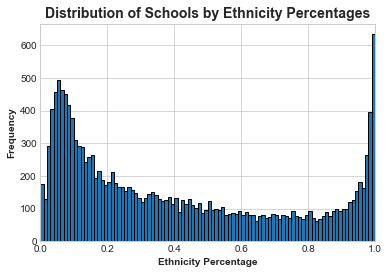

In [49]:
"""What does the distribution of the schools in the dataset look based on ethncitiy?"""
hs.pct_eth.plot.hist(bins=100, xlim = [0,1], edgecolor = 'k')
plt.title('Distribution of Schools by Ethnicity Percentages')
plt.xlabel('Ethnicity Percentage')
# plt.savefig(fname = './Visualizations/By_ethnicity_dist_200.png', dpi = 200)

In [50]:
def eth_grouper(pct):
    if pct <= .20:
        return 1
    elif .20 < pct <= .4:
        return 2
    elif .4 < pct <= 0.6:
        return 3
    elif .6 < pct <= .8:
        return 4
    return 5
    
hs['eth_quintile'] = hs['pct_eth'].apply(lambda pct: eth_grouper(pct))

<div class = 'alert alert-cell alert-info'>**DE**</div>

In [51]:
hs_by_eth_quin = hs.groupby(['eth_quintile', 'SCH_DUAL_IND'])['LEAID'].count().unstack().reset_index()
hs_by_eth_quin['Total Schools'] = (hs_by_eth_quin['No'] + hs_by_eth_quin['Yes'])
hs_by_eth_quin['pct_de'] = round(hs_by_eth_quin['Yes'] / (hs_by_eth_quin['No'] + hs_by_eth_quin['Yes']), 2)
display(hs_by_eth_quin.drop(['No'], axis = 1))

SCH_DUAL_IND,eth_quintile,Yes,Total Schools,pct_de
0,1,4940,6099,0.81
1,2,2316,2967,0.78
2,3,1545,2059,0.75
3,4,1050,1547,0.68
4,5,1712,3053,0.56


<div class = 'alert alert-cell alert-warning'>**AP**</div>

In [52]:
ap_by_eth_quin = hs.groupby(['eth_quintile', 'SCH_APENR_IND'])['LEAID'].count().unstack().reset_index()
ap_by_eth_quin['Total Schools'] = (ap_by_eth_quin['No'] + ap_by_eth_quin['Yes'])
ap_by_eth_quin['pct_ap'] = round(ap_by_eth_quin['Yes'] / (ap_by_eth_quin['No'] + ap_by_eth_quin['Yes']), 2)
display(ap_by_eth_quin.drop(['No'], axis = 1))

SCH_APENR_IND,eth_quintile,Yes,Total Schools,pct_ap
0,1,4014,6099,0.66
1,2,2298,2967,0.77
2,3,1673,2059,0.81
3,4,1240,1547,0.80
4,5,2305,3053,0.75


<div class = 'alert alert-cell alert-danger'>**Visualization**</div>

Text(0.5,0,'')

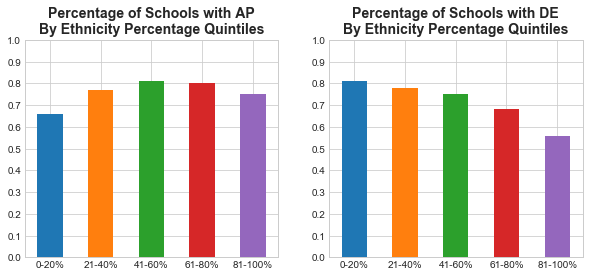

In [53]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,4))
plt.sca(ax1)
ap_by_eth_quin.plot.bar(x = 'eth_quintile', y = 'pct_ap', ax = ax1)
plt.legend([])
plt.title('Percentage of Schools with AP\nBy Ethnicity Percentage Quintiles')
plt.xticks(rotation = 0)
plt.yticks(np.arange(0,1.1,0.1))
plt.ylim([0,1])
plt.xticks([0,1,2,3,4], ['0-20%', '21-40%', '41-60%', '61-80%', '81-100%'])
plt.xlabel('')

plt.sca(ax2)
hs_by_eth_quin.plot.bar(x = 'eth_quintile', y = 'pct_de', ax = ax2)
plt.legend([])
plt.title('Percentage of Schools with DE\nBy Ethnicity Percentage Quintiles')
plt.xticks(rotation = 0)
plt.yticks(np.arange(0,1.1,0.1))
plt.ylim([0,1])
plt.xticks([0,1,2,3,4], ['0-20%', '21-40%', '41-60%', '61-80%', '81-100%'])
plt.xlabel('')

<div class = 'alert alert-cell alert-info'>**Ethnicity Exploration**</div>

In [54]:
"""States with the highest number of 98%+ non-white schools (top 10)"""
hs[hs.pct_eth >= 0.98].groupby('LEA_STATE')['LEAID'].count().sort_values(ascending = False).head(10)

LEA_STATE
CA    174
NY    153
TX    148
IL     70
GA     43
NJ     39
MI     36
MS     36
AZ     32
TN     30
Name: LEAID, dtype: int64

# IX. By (Largest) Districts
How well do the largest districts (chosen by number of schools in the district) in offering DE/AP?

<div class = 'alert alert-cell alert-info'>**DE**</div>

In [55]:
hs_by_district = hs.groupby(['LEAID', 'LEA_NAME', 'LEA_STATE', 'SCH_DUAL_IND'])['LEAID'].count().unstack().reset_index()
hs_by_district = hs_by_district.fillna(0)
hs_by_district[['No', 'Yes']] = hs_by_district[['No', 'Yes']].astype(int)

hs_by_district['Total Schools'] = (hs_by_district['No'] + hs_by_district['Yes'])
hs_by_district['pct_de'] = round(hs_by_district['Yes'] / (hs_by_district['No'] + hs_by_district['Yes']), 2)

In [56]:
"""Top 100 Districts (by number of schools in district) and their DE-Offering Percentages"""
with pd.option_context('display.max_rows', 100):
    display(hs_by_district.drop(['No'], axis = 1).sort_values('Total Schools', ascending = False).reset_index().drop(['index'], axis = 1).head(100))

SCH_DUAL_IND,LEAID,LEA_NAME,LEA_STATE,Yes,Total Schools,pct_de
0,3620580,NEW YORK CITY PUBLIC SCHOOLS,NY,94,347,0.27
1,622710,Los Angeles Unified,CA,60,105,0.57
2,1709930,City of Chicago SD 299,IL,70,97,0.72
3,1200390,DADE,FL,60,77,0.78
4,3200060,CLARK COUNTY SCHOOL DISTRICT,NV,9,46,0.20
5,4700148,Shelby County Schools,TN,24,40,0.60
6,1500030,Hawaii Department of Education,HI,38,39,0.97
7,4823640,HOUSTON ISD,TX,29,38,0.76
8,4218990,Philadelphia City SD,PA,0,37,0.00
9,4816230,DALLAS ISD,TX,26,35,0.74


In [57]:
"""Top 25 Districts at Offering DE"""
hs_by_district.drop(['No'], axis = 1).sort_values(['Total Schools'], ascending = False).reset_index(drop=True).head(100).sort_values('pct_de', ascending = False).reset_index(drop=True).head(25)

SCH_DUAL_IND,LEAID,LEA_NAME,LEA_STATE,Yes,Total Schools,pct_de
0,803450,Douglas County School District No. Re 1,CO,9,9,1.0
1,4819700,FORT WORTH ISD,TX,15,15,1.0
2,612330,Elk Grove Unified,CA,9,9,1.0
3,1302820,Henry County,GA,10,10,1.0
4,1301230,Clayton County,GA,10,10,1.0
5,3904380,Columbus City School District,OH,17,17,1.0
6,4816110,CYPRESS-FAIRBANKS ISD,TX,10,10,1.0
7,1200150,BREVARD,FL,16,16,1.0
8,1301290,Cobb County,GA,16,16,1.0
9,1201590,POLK,FL,15,15,1.0


In [58]:
"""Bottom 25 Districts at Offering DE"""
hs_by_district.drop(['No'], axis = 1).sort_values(['Total Schools'], ascending = False).reset_index(drop=True).head(100).sort_values('pct_de').reset_index(drop=True).head(25)

SCH_DUAL_IND,LEAID,LEA_NAME,LEA_STATE,Yes,Total Schools,pct_de
0,633840,Sacramento City Unified,CA,0,10,0.00
1,2502790,Boston,MA,0,16,0.00
2,3701500,Winston Salem/Forsyth County Schools,NC,0,13,0.00
3,06CC366,Green Dot Public Schools,CA,0,11,0.00
4,3701620,Gaston County Schools,NC,0,11,0.00
5,4218990,Philadelphia City SD,PA,0,37,0.00
6,3904378,Cleveland Metropolitan School District,OH,0,24,0.00
7,619540,Kern High,CA,0,19,0.00
8,2400090,Baltimore City Public Schools,MD,1,18,0.06
9,2612000,Detroit City School District,MI,1,16,0.06


<div class = 'alert alert-cell alert-warning'>**AP**</div>

In [59]:
ap_by_district = hs.groupby(['LEAID', 'LEA_NAME', 'LEA_STATE', 'SCH_APENR_IND'])['LEAID'].count().unstack().reset_index()
ap_by_district = ap_by_district.fillna(0)
ap_by_district[['No', 'Yes']] = ap_by_district[['No', 'Yes']].astype(int)

ap_by_district['Total Schools'] = (ap_by_district['No'] + ap_by_district['Yes'])
ap_by_district['pct_ap'] = round(ap_by_district['Yes'] / (ap_by_district['No'] + ap_by_district['Yes']), 2)

In [60]:
"""Top 100 Districts (by number of schools in district) and their AP-Offering Percentages"""
with pd.option_context('display.max_rows', 100):
    display(ap_by_district.drop(['No'], axis = 1).sort_values('Total Schools', ascending = False).reset_index().drop(['index'], axis = 1).head(100))

SCH_APENR_IND,LEAID,LEA_NAME,LEA_STATE,Yes,Total Schools,pct_ap
0,3620580,NEW YORK CITY PUBLIC SCHOOLS,NY,230,347,0.66
1,622710,Los Angeles Unified,CA,103,105,0.98
2,1709930,City of Chicago SD 299,IL,92,97,0.95
3,1200390,DADE,FL,73,77,0.95
4,3200060,CLARK COUNTY SCHOOL DISTRICT,NV,43,46,0.93
5,4700148,Shelby County Schools,TN,23,40,0.57
6,1500030,Hawaii Department of Education,HI,37,39,0.95
7,4823640,HOUSTON ISD,TX,38,38,1.00
8,4218990,Philadelphia City SD,PA,33,37,0.89
9,4816230,DALLAS ISD,TX,34,35,0.97


In [61]:
"""Top 25 Districts at Offering AP?"""
ap_by_district.drop(['No'], axis = 1).sort_values(['Total Schools'], ascending = False).reset_index(drop = True).head(100).sort_values('pct_ap', ascending = False).reset_index(drop=True).head(25)

SCH_APENR_IND,LEAID,LEA_NAME,LEA_STATE,Yes,Total Schools,pct_ap
0,803450,Douglas County School District No. Re 1,CO,9,9,1.0
1,3904375,Cincinnati City,OH,11,11,1.0
2,2400330,Frederick County Public Schools,MD,10,10,1.0
3,1302550,Gwinnett County,GA,20,20,1.0
4,101920,Jefferson County,AL,10,10,1.0
5,1201530,PASCO,FL,11,11,1.0
6,4833120,NORTHSIDE ISD,TX,11,11,1.0
7,06CC366,Green Dot Public Schools,CA,11,11,1.0
8,4819650,FORT BEND ISD,TX,11,11,1.0
9,616230,Grossmont Union High,CA,11,11,1.0


In [62]:
"""Bottom 25 Districts at Offering AP?"""
ap_by_district.drop(['No'], axis = 1).sort_values(['Total Schools'], ascending = False).reset_index(drop = True).head(100).sort_values('pct_ap', ascending = True).reset_index(drop=True).head(25)

SCH_APENR_IND,LEAID,LEA_NAME,LEA_STATE,Yes,Total Schools,pct_ap
0,3904378,Cleveland Metropolitan School District,OH,0,24,0.00
1,4701590,Hamilton County,TN,6,12,0.50
2,901920,HARTFORD SCHOOL DISTRICT,CT,6,11,0.55
3,2400090,Baltimore City Public Schools,MD,10,18,0.56
4,4700148,Shelby County Schools,TN,23,40,0.57
5,3620580,NEW YORK CITY PUBLIC SCHOOLS,NY,230,347,0.66
6,2612000,Detroit City School District,MI,11,16,0.69
7,634320,San Diego Unified,CA,21,30,0.70
8,3200480,WASHOE COUNTY SCHOOL DISTRICT,NV,12,16,0.75
9,3624750,ROCHESTER CITY SCHOOL DISTRICT,NY,9,12,0.75


<div class = 'alert alert-cell alert-danger'>**Visualizations**</div>

Text(0.5,1,'AP-Offering Percentages of the Top 100 Districts')

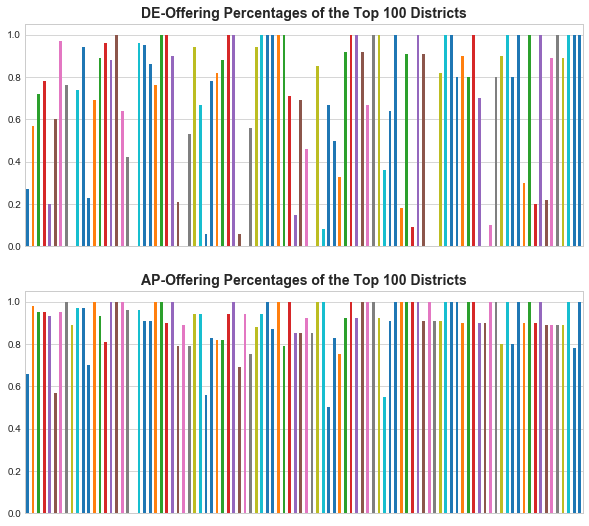

In [63]:
"""Distribution of AP-Offering Percentages sorted by largest to smallest districts (top 100), so left-x-axis have the
largest districts, and right-x-axis have the smallest."""
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,9))

plt.sca(ax1)
hs_by_district.drop(['No'], axis = 1).sort_values('Total Schools', ascending = False).reset_index().drop(['index'], axis = 1).head(100)['pct_de'].plot.bar(ax=ax1)
plt.xticks([])
plt.title('DE-Offering Percentages of the Top 100 Districts')

plt.sca(ax2)
ap_by_district.drop(['No'], axis = 1).sort_values('Total Schools', ascending = False).reset_index(drop = True).head(100)['pct_ap'].plot.bar(ax=ax2)
plt.xticks([])
plt.title('AP-Offering Percentages of the Top 100 Districts')

Text(0.5,1,'AP-Offering Percentages of the Top 100 Districts\n(Sorted By AP_PCT)')

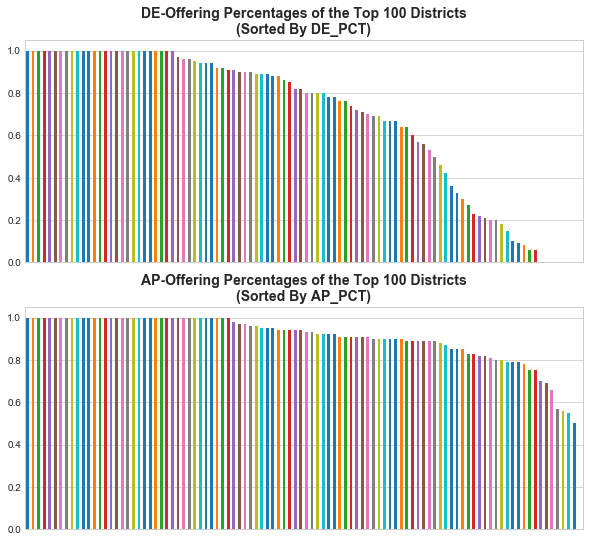

In [64]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10,9))
plt.sca(ax1)
hs_by_district.drop(['No'], axis = 1).sort_values(['Total Schools'], ascending = False).reset_index(drop=True).head(100).sort_values('pct_de', ascending = False)['pct_de'].plot.bar(ax=ax1)
plt.xticks([])
plt.title('DE-Offering Percentages of the Top 100 Districts\n(Sorted By DE_PCT)')

plt.sca(ax2)
ap_by_district.drop(['No'], axis = 1).sort_values('Total Schools', ascending = False).reset_index(drop = True).head(100).sort_values('pct_ap', ascending = False)['pct_ap'].plot.bar(ax=ax2)
plt.xticks([])
plt.title('AP-Offering Percentages of the Top 100 Districts\n(Sorted By AP_PCT)')

# ScatterGeo

In [65]:
de_map = {'Yes':1, 'No':0}
dual_enroll_bin = hs.SCH_DUAL_IND.map(de_map)

In [66]:
# scl = [ [0,"rgb(5, 10, 172)"], [1,"rgb(0, 200, 100)"] ]


# data = [ dict(
#         type = 'scattergeo',
#         locationmode = 'USA-states',
#         lon = hs['LON1516'],
#         lat = hs['LAT1516'],
#         mode = 'markers',
#         marker = dict(
#             size = 5,
#             opacity = 0.8,
#             autocolorscale = False,
#             line = dict(
#                 width=1,
#                 color='rgba(255,255,255,1)'
#             ),
#             colorscale = scl,
#             cmin = 0,
#             color = dual_enroll_bin,
#             cmax = 1,
#         ))]

# layout = dict(
#         geo = dict(
#             scope='usa',
#             projection=dict( type='albers usa' ),
            
#         ),
#     )

# fig = dict( data=data, layout=layout )
# # fig = go.Figure(data = [data], layout = layout)
# iplot(fig, image = 'png', filename = '02_ScatterGeo_DE_1516', image_width = 3500, image_height=3250)

print("To see the scattergeo, uncomment code and change the size of the markers (to 3-5) -- Very cumbersome Graph")

To see the scattergeo, uncomment code and change the size of the markers (to 3-5) -- Very cumbersome Graph
